In [ ]:
import itertools

# classes
k = 2
K = [k for k in range(0, k)]
print("classes", K)

# dimensions
d_dimension = 5

# Measurement space
def orgainze_L(components):
  L =  [[i for i in range(0, c)] for c in components]
  return L
    

components = [2,3,4,2,3]
L = orgainze_L(components)
print("components for each dimension", L)


def M_Space(L):
  combinations = []
  for m in itertools.product(*L):
    combinations.append(m)
  return combinations

M = M_Space(L)
print("measurement space", M)


classes [0, 1]
components for each dimension [[0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1], [0, 1, 2]]
measurement space [(0, 0, 0, 0, 0), (0, 0, 0, 0, 1), (0, 0, 0, 0, 2), (0, 0, 0, 1, 0), (0, 0, 0, 1, 1), (0, 0, 0, 1, 2), (0, 0, 1, 0, 0), (0, 0, 1, 0, 1), (0, 0, 1, 0, 2), (0, 0, 1, 1, 0), (0, 0, 1, 1, 1), (0, 0, 1, 1, 2), (0, 0, 2, 0, 0), (0, 0, 2, 0, 1), (0, 0, 2, 0, 2), (0, 0, 2, 1, 0), (0, 0, 2, 1, 1), (0, 0, 2, 1, 2), (0, 0, 3, 0, 0), (0, 0, 3, 0, 1), (0, 0, 3, 0, 2), (0, 0, 3, 1, 0), (0, 0, 3, 1, 1), (0, 0, 3, 1, 2), (0, 1, 0, 0, 0), (0, 1, 0, 0, 1), (0, 1, 0, 0, 2), (0, 1, 0, 1, 0), (0, 1, 0, 1, 1), (0, 1, 0, 1, 2), (0, 1, 1, 0, 0), (0, 1, 1, 0, 1), (0, 1, 1, 0, 2), (0, 1, 1, 1, 0), (0, 1, 1, 1, 1), (0, 1, 1, 1, 2), (0, 1, 2, 0, 0), (0, 1, 2, 0, 1), (0, 1, 2, 0, 2), (0, 1, 2, 1, 0), (0, 1, 2, 1, 1), (0, 1, 2, 1, 2), (0, 1, 3, 0, 0), (0, 1, 3, 0, 1), (0, 1, 3, 0, 2), (0, 1, 3, 1, 0), (0, 1, 3, 1, 1), (0, 1, 3, 1, 2), (0, 2, 0, 0, 0), (0, 2, 0, 0, 1), (0, 2, 0, 0, 2), (0, 2, 0, 1, 0),

In [ ]:
def address(d, L):
  accum = [1.]
  for l in L:
    previous = accum[len(accum) - 1]
    product = previous * len(l)
    accum.append(product)
  accum = accum[:-1]
  addr = int(sum([ f * v for f, v in zip(d, accum) ]))
  return addr
  

# print(address([1],[ [0, 1] ]))
# print(address([0, 0],[ [0, 1], [0, 1] ]))

def address_book(L, M):
  addresses = []
  for m in M:
    addr = address(m, L)
    addresses.append(addr)
  return addresses


addresses = address_book(L, M)
print(addresses)
print(len(addresses))

[0, 48, 96, 24, 72, 120, 6, 54, 102, 30, 78, 126, 12, 60, 108, 36, 84, 132, 18, 66, 114, 42, 90, 138, 2, 50, 98, 26, 74, 122, 8, 56, 104, 32, 80, 128, 14, 62, 110, 38, 86, 134, 20, 68, 116, 44, 92, 140, 4, 52, 100, 28, 76, 124, 10, 58, 106, 34, 82, 130, 16, 64, 112, 40, 88, 136, 22, 70, 118, 46, 94, 142, 1, 49, 97, 25, 73, 121, 7, 55, 103, 31, 79, 127, 13, 61, 109, 37, 85, 133, 19, 67, 115, 43, 91, 139, 3, 51, 99, 27, 75, 123, 9, 57, 105, 33, 81, 129, 15, 63, 111, 39, 87, 135, 21, 69, 117, 45, 93, 141, 5, 53, 101, 29, 77, 125, 11, 59, 107, 35, 83, 131, 17, 65, 113, 41, 89, 137, 23, 71, 119, 47, 95, 143]
144


In [ ]:
import numpy as np
def priors(K):
  priors = []
  for k in K:
    priors.append(np.random.rand())
  total = sum(priors)
  for k in K:
    priors[k] = priors[k]/total
  return priors

my_priors = priors(K)
print(my_priors)
print(sum(my_priors))

[0.3516210517229391, 0.6483789482770608]
0.9999999999999999


In [ ]:

def generate_class_conditionals(K, addresses):
# generate class conditionals by address
  class_conditionals = {} 
  class_conditionals_by_class = []
  for k in K:
    random_numbers = np.random.rand(len(addresses))
    sum_ = sum(random_numbers)
    class_conditional_k = np.array([number/sum_ for number in random_numbers])
    class_conditionals_by_class.append(class_conditional_k)
  #print(class_conditionals_by_class)
  for i, addr in enumerate(addresses):
    class_conditionals[addr] = np.array([array[i] for array in class_conditionals_by_class])
  return class_conditionals

my_class_conditionals = generate_class_conditionals(K, addresses)
print(my_class_conditionals)
print(len(my_class_conditionals))

{0: array([0.00709476, 0.00836258]), 48: array([0.00521655, 0.00490842]), 96: array([0.00061576, 0.01305357]), 24: array([0.00128422, 0.01012793]), 72: array([0.00278561, 0.00605042]), 120: array([0.00343714, 0.00689401]), 6: array([0.01107565, 0.00428232]), 54: array([0.01238257, 0.00585932]), 102: array([0.00797966, 0.00703876]), 30: array([0.0110974 , 0.00947755]), 78: array([0.00053813, 0.00660574]), 126: array([0.00538697, 0.00146765]), 12: array([0.00289147, 0.01324644]), 60: array([0.0089204 , 0.00337932]), 108: array([0.00588202, 0.00273979]), 36: array([0.01131095, 0.01073237]), 84: array([0.00295996, 0.00408203]), 132: array([0.00982919, 0.00135883]), 18: array([0.01010949, 0.00654648]), 66: array([0.01017036, 0.01038371]), 114: array([0.0064833 , 0.00082656]), 42: array([0.00696927, 0.01287502]), 90: array([0.01151148, 0.00611706]), 138: array([0.00067506, 0.00059627]), 2: array([0.01226203, 0.00547748]), 50: array([0.00012818, 0.00367699]), 98: array([0.01137677, 0.00070654

In [ ]:
def economic_gain_matrix(K): 
    empty_list = []
    for i in K:
        for j in K:
            if i == j:
                empty_list.append(1) # default identity matrix 
            else:
                empty_list.append(0)

    gainmatrix = np.reshape(empty_list, (k,k))
    return gainmatrix

my_gain_matrix = economic_gain_matrix(K)
print(my_gain_matrix)

[[1 0]
 [0 1]]


In [ ]:
def generate_cpd(Y): 
  P = np.random.rand(Y) 
  normalized = [p/sum(P) for p in P]
  # Form cumulative distribution <q0...qy>
  Q = []
  s = 0
  for i in range(Y):
      s += normalized[i]
      Q.append(s)           
  return Q


def generate_sample(N, J): #N is the number of rows #value set J
  V = [] 
  #cummulative probability distirbution of the size of z
  sample_probabilities = generate_cpd(len(J))
  for i in range(0, N):
      x = np.random.rand(1)
      if x <= sample_probabilities[0]:
          V.append(0)
      else:
          for j in range(len(J)-1):
              if sample_probabilities[j] < x <= sample_probabilities[j+1]:
                  V.append(j+1)
  return V



def generate_class_tags(k, N):  # k is the number of classes, #N is the number of rows
  M = []
  class_tag_probabilities = generate_cpd(k)
  #print(class_tag_probabilities)
  for i in range(0, N):
    x = np.random.rand(1)
    if x < class_tag_probabilities[0]:
        M.append(0)
    else:
        for j in range(k-1):
            if class_tag_probabilities[j] <= x < class_tag_probabilities[j+1]:
                M.append(j+1)
          
  return M



## Option2 generate class tags based on addresses

In [ ]:
def generate_class_tags_2(k, addressbook):  # k is the number of classes, #N is the number of rows
  M = {}
  class_tag_probabilities = generate_cpd(k)
  #print(class_tag_probabilities)
  for i, addr in enumerate(addressbook):
    x = np.random.rand(1)
    if x < class_tag_probabilities[0]:
        M[addr] = 0
    else:
        for j in range(k-1):
            if class_tag_probabilities[j] <= x < class_tag_probabilities[j+1]:
                M[addr] = j+1
          
  return M


def generate_synthetic_data_2(L, k, N, class_and_address ): #N is number of rows, k is number of classes
  columns = [generate_sample(N, l) for l in L]
  #print(columns)
  synthetic_X = np.vstack((columns)).T
  synthetic_X = synthetic_X.tolist()
  #generate synthetic Y
  for x in synthetic_X:
    x_address = address(x, L)
    class_of_x = class_and_address[x_address]
    synthetic_Y.append(class_of_x)
  return synthetic_X, synthetic_Y

L = L
k = k
N = 5000
class_and_address = generate_class_tags_2(k, addresses)
my_data = generate_synthetic_data_2(L, k, N, class_and_address)
synthetic_X = my_data[0]
synthetic_Y = my_data[1]

print(synthetic_X)
print("true Y", synthetic_Y)

[[0, 0], [1, 0], [0, 0], [0, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 1], [1, 1], [1, 0], [0, 0], [0, 0], [0, 1], [0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 1], [1, 1], [1, 0], [1, 1], [1, 0], [0, 0], [1, 0], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [0, 0], [1, 0], [0, 0], [0, 1], [0, 0], [1, 0], [1, 0], [1, 0], [0, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 1], [0, 0], [1, 0], [0, 0], [1, 0], [0, 0], [1, 0], [0, 1], [0, 0], [1, 0], [1, 1], [0, 0], [1, 0], [1, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 0], [1, 0], [0, 1], [0, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 1], [1, 1], [0, 1], [0, 0], [1, 0], [1, 1], [1, 0], [1, 1], [1, 1], [1, 1], [1, 0], [1, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 1], [1, 0], [1, 0], [1, 1], [1, 0], [0, 0], [1, 1], [1, 1], [1, 0], [1, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [1, 1], [1, 0], [1, 1], [1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [0, 0], [1, 1], [1, 0], [1, 0], [1, 0], [1, 1], [1, 0], [1, 1], [1, 0], [0, 0], [1, 0], [0, 1], [1, 0],

In [ ]:
print(address(synthetic_X[0], L))


67


#synthetic data generator

In [ ]:
def generate_synthetic_data(L, k, N ): #N is number of rows, k is number of classes
  columns = [generate_sample(N, l) for l in L]
  #print(columns)
  synthetic_X = np.vstack((columns)).T
  synthetic_X = synthetic_X.tolist()
  #generate synthetic Y
  synthetic_Y = generate_class_tags(k, N)
  # for x in synthetic_X:
  #   x_address = address(x, L)
  #   class_of_x = class_and_address[x_address]
  #   synthetic_Y.append(class_of_x)
  return synthetic_X, synthetic_Y

N = 5000
my_data = generate_synthetic_data(L, k, N)
synthetic_X = my_data[0]
synthetic_Y = my_data[1]
print(synthetic_X)
print(synthetic_Y)

[[0, 0, 3, 1, 0], [0, 0, 0, 1, 0], [0, 2, 0, 1, 0], [0, 0, 0, 1, 2], [0, 2, 0, 0, 0], [0, 0, 3, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 2], [0, 0, 0, 1, 2], [0, 1, 3, 1, 0], [0, 2, 3, 0, 2], [0, 2, 2, 1, 2], [0, 0, 0, 0, 0], [0, 1, 1, 1, 2], [0, 0, 3, 1, 0], [0, 2, 3, 0, 0], [0, 2, 0, 0, 0], [0, 0, 2, 1, 2], [0, 0, 0, 1, 0], [0, 2, 3, 1, 0], [0, 0, 0, 1, 2], [0, 0, 0, 1, 2], [0, 2, 2, 1, 0], [0, 2, 3, 0, 2], [0, 2, 2, 1, 0], [0, 0, 0, 1, 2], [0, 0, 0, 0, 0], [0, 2, 3, 0, 2], [1, 0, 3, 1, 0], [0, 1, 3, 0, 2], [0, 2, 3, 1, 0], [0, 2, 0, 1, 2], [0, 0, 2, 0, 2], [0, 1, 0, 0, 0], [0, 2, 3, 0, 0], [0, 2, 0, 1, 0], [0, 1, 0, 1, 0], [0, 2, 3, 1, 0], [0, 0, 3, 1, 2], [0, 0, 0, 1, 0], [0, 2, 0, 1, 2], [0, 1, 0, 1, 2], [0, 1, 1, 1, 0], [0, 2, 3, 1, 0], [0, 1, 1, 1, 0], [0, 2, 0, 1, 0], [0, 0, 0, 0, 0], [0, 0, 3, 0, 0], [0, 1, 0, 0, 0], [0, 1, 2, 1, 2], [0, 1, 0, 1, 2], [1, 2, 3, 0, 2], [0, 2, 0, 0, 2], [0, 1, 2, 0, 0], [0, 2, 0, 0, 2], [0, 0, 0, 0, 0], [0, 1, 0, 1, 0], [1, 0, 0, 1, 2], [0, 1, 2, 0, 

## k fold

In [ ]:
def split_data_into_K_fold(K_fold, N, X, y):
  rows_per_fold = int(N/K_fold)
  new_X = []
  new_y = []
  for k in range(0, K_fold):
    X_ = X[k*rows_per_fold : (k+1)*rows_per_fold]
    new_X.append(X_)
    y_ = y[k*rows_per_fold : (k+1)*rows_per_fold]
    new_y.append(y_)
  return new_X, new_y


In [ ]:
def modify_class_conditionals(K, X, L, y_predict, y_true, delta, class_conditional_probabilities):
  for i, prediction in enumerate(y_predict):
    true_class = y_true[i]
    if not prediction == true_class:
      address_of_x = address(X[i], L)
      class_conditional_probabilities[address_of_x][true_class] += delta
  #print(class_conditional_probabilities)
  #normalize
  normalized_conditionals = []
  for k in K:
    class_k = [values[k] for values in class_conditional_probabilities.values()]
    class_k_total = sum(class_k)
    class_k = [p/class_k_total for p in class_k]
    normalized_conditionals.append(np.array(class_k))
  #print(normalized_conditionals)
  class_conditionals = {}
  for i, addr in enumerate(list(class_conditional_probabilities.keys())):
    class_conditionals[addr] = np.array([a[i] for a in normalized_conditionals])
  return class_conditionals

In [ ]:

def prediction_and_gains(matrix, X, L, class_conditional_probabilities, prior_probabilities):
  predictions = []
  economic_gains = []
  addresses_X = [address(x, L) for x in X]
  for i, x in enumerate(X):
    address_of_x = address(x, L)
    class_conditionals_of_x = class_conditional_probabilities[address_of_x]
    posteriors = class_conditionals_of_x * prior_probabilities
    possible_gains = [ sum(posteriors * matrix[:,i]) for i in range(0, matrix.shape[1]) ]
    economic_gains.append(max(possible_gains))
    predictions.append(np.argmax(possible_gains))
  return predictions, economic_gains


def accuracy(predictions, true):
  count = 0
  for i, pred in enumerate(predictions):
    if pred == true[i]:
      count+=1
  #print(count)
  return count/len(predictions)


5 fold validation: round 1
economic gains from the training set is: 20.309421878279235
Accuracy from the training is: 0.68275
economic gains from the testing set is: 5.0274846207401875
Accuracy from the testing is: 0.673
5 fold validation: round 2
economic gains from the training set is: 20.283859573480125
Accuracy from the training is: 0.68325
economic gains from the testing set is: 5.053046925539298
Accuracy from the testing is: 0.671
5 fold validation: round 3
economic gains from the training set is: 20.174633386582617
Accuracy from the training is: 0.67475
economic gains from the testing set is: 5.162273112436808
Accuracy from the testing is: 0.705
5 fold validation: round 4
economic gains from the training set is: 20.329160688039916
Accuracy from the training is: 0.68225
economic gains from the testing set is: 5.007745810979476
Accuracy from the testing is: 0.675
5 fold validation: round 5
economic gains from the training set is: 20.250550469695337
Accuracy from the training is: 0

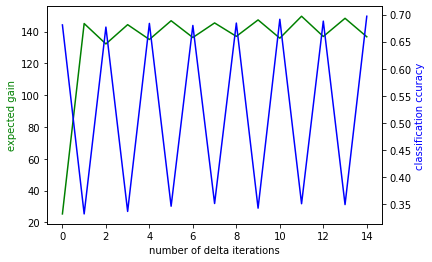

In [ ]:
delta_rounds = 15
delta = 0.02
number_of_folds = 5

total_gains = []
total_accuracy = []
for r in range(0, delta_rounds):
  splitted_data = split_data_into_K_fold(number_of_folds, N, synthetic_X, synthetic_Y)
  X_folds = splitted_data[0]
  y_folds = splitted_data[1]
  for k in range(0, number_of_folds):
    print(number_of_folds, "fold validation:", "round", k+1)
    test_X = X_folds[k]
    test_y = y_folds[k]
    train_X = X_folds.copy()
    train_X.pop(k)
    train_X = sum(train_X, [])
    train_y = y_folds.copy()
    train_y.pop(k)
    train_y = sum(train_y, [])
    # Train and report train set gains and accuracy
    labels_and_gains_train = prediction_and_gains(my_gain_matrix, train_X, L, my_class_conditionals, my_priors)
    predicted_labels_train = labels_and_gains_train[0]
    economic_gains_train = sum(labels_and_gains_train[1])
    print("economic gains from the training set is:", economic_gains_train)
    print("Accuracy from the training is:", accuracy(predicted_labels_train, train_y))
    # Test and report economic gains and accuracy on the test set 
    labels_and_gains_test = prediction_and_gains(my_gain_matrix, test_X, L, my_class_conditionals, my_priors)
    predicted_labels_test = labels_and_gains_test[0]
    economic_gains_test = sum(labels_and_gains_test[1])
    print("economic gains from the testing set is:", economic_gains_test)
    print("Accuracy from the testing is:", accuracy(predicted_labels_test, test_y))
  # Use the entire dataset to modify class conditionals based on the predictions
  if r < delta_rounds-1:
    print('Modifying class conditionals', "round", r+1)
  my_prediction = prediction_and_gains(my_gain_matrix, synthetic_X, L, my_class_conditionals, my_priors)
  labels = my_prediction[0]
  classification_accuracy = accuracy(labels, synthetic_Y)
  total_accuracy.append(classification_accuracy)
  gains = sum(my_prediction[1])
  total_gains.append(gains)
  my_class_conditionals = modify_class_conditionals(K, synthetic_X, L, labels, synthetic_Y, delta, my_class_conditionals)

#plot delta iteration againts economic gain:
import matplotlib.pyplot as plt
x = range(0, delta_rounds)
y_1 = total_gains
y_2 = total_accuracy

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y_1, 'g')
ax2.plot(x, y_2, 'b')

ax1.set_xlabel('number of delta iterations')
ax1.set_ylabel('expected gain', color='g')
ax2.set_ylabel('classification ccuracy', color='b')
plt.show()

In [ ]:
## Training and testing
delta_rounds = 10
delta = 0.03
for k in range(0, number_of_folds):
  print("Round Robin", k+1)
  test_X = X_folds[k]
  test_y = y_folds[k]
  train_X = X_folds.copy()
  train_X.pop(k)
  train_X = sum(train_X, [])
  train_y = y_folds.copy()
  train_y.pop(k)
  train_y = sum(train_y, [])
  for j in range(0, delta_rounds):
    print("Adding delta", j)
    # Train and report train set gains and accuracy
    labels_and_gains_train = prediction_and_gains(my_gain_matrix, train_X, L, my_class_conditionals, my_priors)
    predicted_labels = labels_and_gains_train[0]
    economic_gains_train = sum(labels_and_gains_train[1])
    print("economic gains from the training set is:", economic_gains_train)
    print("Accuracy from the training is:", accuracy(predicted_labels, train_y))
    # Modify class conditionals on based on the train set predictions
    my_class_conditionals = modify_class_conditionals(K, train_X, L, predicted_labels, train_y, delta, my_class_conditionals)
    # Test and report economic gains and accuracy on the test set 
    labels_and_gains_test = prediction_and_gains(my_gain_matrix, test_X, L, my_class_conditionals, my_priors)
    predicted_labels_test = labels_and_gains_test[0]
    economic_gains_test = sum(labels_and_gains_test[1])
    print("economic gains from the testing set is:", economic_gains_test)
    print("Accuracy from the testing is:", accuracy(predicted_labels_test, test_y))
  
